<a href="https://colab.research.google.com/github/chltjs1921/2024_modeling_practice/blob/main/Graph_replicate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install rdkit-pypi
!pip -q install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 57.6 MB/s eta 0:00:00


In [2]:
from rdkit import Chem, RDLogger
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
csv_path = '/content/drive/MyDrive/udemy/graph-generation/qm9.csv'
data = []
with open(csv_path, "r") as f:
    for line in f.readlines()[1:]:
        data.append(line.split(",")[1])

In [6]:
data[-1]

'C1N2C3C4C5OC13C2C45'

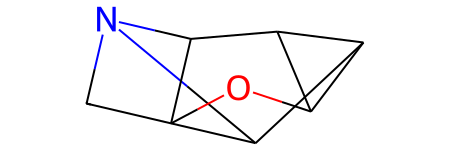

In [7]:
molecule = Chem.MolFromSmiles(data[-1])
molecule

In [8]:
atom_mapping = {
    "C": 0,
    0: "C",
    "N": 1,
    1: "N",
    "O": 2,
    2: "O",
    "F": 3,
    3: "F",
}

bond_mapping = {
    "SINGLE": 0,
    0: Chem.BondType.SINGLE,
    "DOUBLE": 1,
    1: Chem.BondType.DOUBLE,
    "TRIPLE": 2,
    2: Chem.BondType.TRIPLE,
    "AROMATIC": 3,
    3: Chem.BondType.AROMATIC,
}

In [9]:
NUM_ATOMS = 9
ATOM_DIM = 4 + 1 # 1은 예외적 feature
BOND_DIM = 4 + 1
LATENT_DIM = 64

In [10]:
for atom in molecule.GetAtoms():
    print(atom.GetSymbol())

C
N
C
C
C
O
C
C
C
